<a href="https://colab.research.google.com/github/Harishankarvel/LAUN_ML_project/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset 'ODI data.csv' loaded successfully.
Analyzing 812 players with at least 30 matches.

Generating K-Means Cluster Plot...


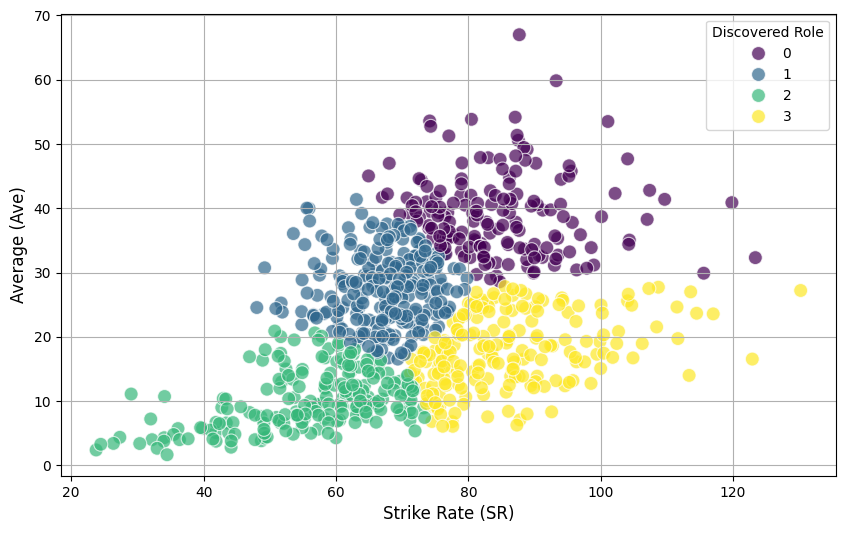

Naive Bayes Model Accuracy: 95.90%

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.99        74
           2       0.89      0.97      0.93        60
           3       0.98      0.88      0.93        60

    accuracy                           0.96       244
   macro avg       0.96      0.96      0.96       244
weighted avg       0.96      0.96      0.96       244


Generating Naive Bayes Confusion Matrix Plot...


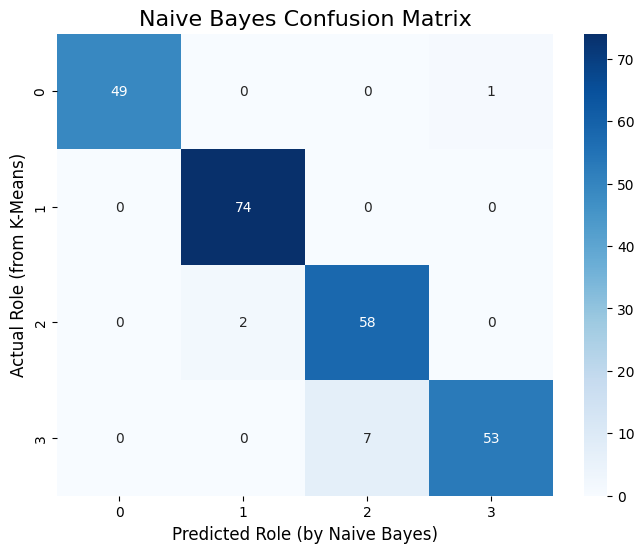

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

try:
    player_stats = pd.read_csv('ODI data.csv', index_col=0)
    print("Dataset 'ODI data.csv' loaded successfully.")
except FileNotFoundError:
    print("ERROR: 'ODI data.csv' not found. Please upload the file to your Colab session.")
    exit()

features_df = player_stats[['Player', 'Mat', 'Ave', 'SR']].copy()
features_df['Ave'] = pd.to_numeric(features_df['Ave'], errors='coerce')
features_df['SR'] = pd.to_numeric(features_df['SR'], errors='coerce')
features_df['Mat'] = pd.to_numeric(features_df['Mat'], errors='coerce')
features_df.dropna(subset=['Ave', 'SR', 'Mat'], inplace=True)
features_df = features_df[features_df['Mat'] >= 30].copy()
print(f"Analyzing {len(features_df)} players with at least 30 matches.")

features_for_scaling = features_df[['Ave', 'SR']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_scaling)


optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
features_df['Role'] = kmeans.fit_predict(scaled_features)


print("\nGenerating K-Means Cluster Plot...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SR', y='Ave', hue='Role', data=features_df, palette='viridis', s=100, alpha=0.7)

plt.xlabel('Strike Rate (SR)', fontsize=12)
plt.ylabel('Average (Ave)', fontsize=12)
plt.legend(title='Discovered Role')
plt.grid(True)
plt.show()


X = scaled_features
y = features_df['Role']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Accuracy: {accuracy:.2%}")

print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred))

print("\nGenerating Naive Bayes Confusion Matrix Plot...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(optimal_k),
            yticklabels=range(optimal_k))
plt.title('Naive Bayes Confusion Matrix', fontsize=16)
plt.ylabel('Actual Role (from K-Means)', fontsize=12)
plt.xlabel('Predicted Role (by Naive Bayes)', fontsize=12)
plt.show()